# knn model

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [237]:
data=pd.read_csv("E:\\internshala data science course\\COURSE 5-ML\\Resources-NYC Taxi Trip Project\\nyc_taxi_trip_duration.csv")

In [238]:
data.shape

(729322, 11)

In [239]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [240]:
# converting time format to timestamp and extracting time

In [241]:
from datetime import datetime
import time

In [242]:
data["pickup_datetime"]=data["pickup_datetime"].astype(str)
data["dropoff_datetime"]=data["pickup_datetime"].astype(str)
data["pickup_time"]=data["pickup_datetime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data["dropoff_time"]=data["pickup_datetime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data["pickup_time"]=pd.to_datetime(data["pickup_time"],format="%Y-%m-%d %H:%M:%S")
data["dropoff_time"]=pd.to_datetime(data["dropoff_time"],format="%Y-%m-%d %H:%M:%S")
data["pickup_time"]=data["pickup_time"].apply(lambda x: x.hour*3600+x.minute*60+x.second)
data["dropoff_time"]=data["dropoff_time"].apply(lambda x: x.hour*3600+x.minute*60+x.second)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,dropoff_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60021,60021
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,84937,84937
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,64773,64773
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,35071,35071
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,N,848,24143,24143


In [243]:
# converting vendor_id and passenger_count to categorical type

In [244]:
data["vendor_id"]=data.vendor_id.astype("category")
data["passenger_count"]=data.passenger_count.astype("category")

In [245]:
# taking a sample of 10000 records
df=data.sample(10000)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,dropoff_time
638319,id1393732,1,2016-01-21 10:58:14,2016-01-21 10:58:14,1,-73.951523,40.778717,-73.957375,40.785355,N,259,39494,39494
663396,id0590680,1,2016-05-01 01:27:54,2016-05-01 01:27:54,2,-74.008018,40.740147,-73.981506,40.737244,N,607,5274,5274
109992,id2104901,1,2016-06-28 18:44:38,2016-06-28 18:44:38,1,-73.990791,40.730423,-74.003609,40.730068,N,509,67478,67478
619160,id3850356,1,2016-04-17 20:25:21,2016-04-17 20:25:21,1,-73.971542,40.794735,-73.961525,40.796940,N,235,73521,73521
509437,id0115030,2,2016-03-20 17:35:37,2016-03-20 17:35:37,1,-73.982185,40.751049,-73.974541,40.759056,N,301,63337,63337


### Segregating variables: Independent and Dependent Variables

In [246]:
x = df.drop(["trip_duration","pickup_datetime","dropoff_datetime","id","store_and_fwd_flag","dropoff_time"],axis=1)
y = df['trip_duration']
x.shape, y.shape

((10000, 7), (10000,))

In [247]:
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_time
638319,1,1,-73.951523,40.778717,-73.957375,40.785355,39494
663396,1,2,-74.008018,40.740147,-73.981506,40.737244,5274
109992,1,1,-73.990791,40.730423,-74.003609,40.730068,67478
619160,1,1,-73.971542,40.794735,-73.961525,40.796940,73521
509437,2,1,-73.982185,40.751049,-73.974541,40.759056,63337


In [248]:
x=pd.get_dummies(x)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_time,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
638319,-73.951523,40.778717,-73.957375,40.785355,39494,1,0,0,1,0,0,0,0,0,0,0
663396,-74.008018,40.740147,-73.981506,40.737244,5274,1,0,0,0,1,0,0,0,0,0,0
109992,-73.990791,40.730423,-74.003609,40.730068,67478,1,0,0,1,0,0,0,0,0,0,0
619160,-73.971542,40.794735,-73.961525,40.796940,73521,1,0,0,1,0,0,0,0,0,0,0
509437,-73.982185,40.751049,-73.974541,40.759056,63337,0,1,0,1,0,0,0,0,0,0,0


### Scaling the data (Using MinMax Scaler)

In [249]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [250]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [251]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_time,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,0.302400,0.633346,0.398040,0.531000,0.457049,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.227067,0.512561,0.378720,0.447414,0.060934,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250038,0.482111,0.361024,0.434948,0.780979,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.275705,0.683506,0.394718,0.551128,0.850930,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.261514,0.546702,0.384297,0.485310,0.733045,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x_scaled,y, random_state = 56)

In [253]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [254]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y,squared=False)
print("Test RMSE : ", k )

Test RMSE :  3645.7805901595343


# fingding the best value of k using elbow method

In [255]:
def rmse_K(k):
    test_rmse=[]
    for i in k:
        reg=KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        k_predict=reg.predict(test_x)
        k_rmse=mse(k_predict,test_y,squared=False)
        test_rmse.append(k_rmse)
    return test_rmse

In [256]:
k=range(1,50)
k

range(1, 50)

In [257]:
test_k=rmse_K(k)
test_k

[4198.5940440580825,
 3934.7084209633626,
 3844.2537133811084,
 3724.2951135181274,
 3645.7805901595343,
 3644.032838993999,
 3616.959254465732,
 3610.3930742025864,
 3596.279862571294,
 3580.6135319165624,
 3577.013206727665,
 3579.956020828561,
 3581.5655598875724,
 3568.77555012034,
 3576.412872442256,
 3571.41301953355,
 3560.04400681871,
 3557.9536581181105,
 3554.974521511216,
 3549.238730308797,
 3544.421450490802,
 3542.627541920132,
 3535.7456439710836,
 3536.278072851632,
 3534.279039585822,
 3530.845039447096,
 3530.554904108263,
 3527.8980748720937,
 3525.355759854677,
 3523.837753915025,
 3521.013622712256,
 3517.990515956206,
 3517.002117356667,
 3514.566109107475,
 3515.2198746149343,
 3513.953493723054,
 3511.9429274391373,
 3509.542067952413,
 3507.503051265485,
 3505.4718286052453,
 3504.334018799833,
 3502.9009658755654,
 3502.716922055333,
 3501.3678104542705,
 3502.4902833107785,
 3503.792337211373,
 3503.05914852295,
 3502.1994091118167,
 3501.8464289683857]

In [258]:
#plotting the elbow curve

Text(0.5, 1.0, 'elbow curve')

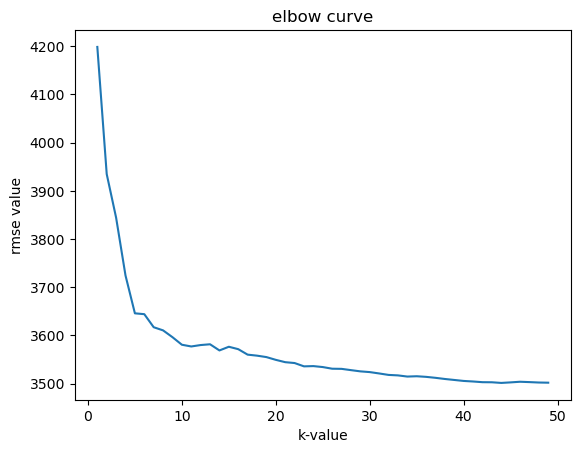

In [259]:
plt.plot(k,test_k)
plt.xlabel("k-value")
plt.ylabel("rmse value")
plt.title("elbow curve")

In [260]:
# we deduce from the elbow curve that best value of k is 10

In [261]:
# Creating instance of KNN for k=10
reg = KNN(n_neighbors = 10)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y,squared=False)
print("Test RMSE : ", k )

Test RMSE :  3580.6135319165624


### train score

In [262]:
train_score_knn=reg.score(train_x,train_y)
train_score_knn

0.1222185907472706

In [263]:
test_score_knn=reg.score(test_x,test_y)
test_score_knn

-0.06503894340635252

### conclusions
1. The best value of k by elbow curve method is 10.
2. The rmse value for k=10 is 3890.900289397301.
3. Train score=0.1298709228851228
4. Test score=-0.031089967869172952

# LINEAR REGRESSION MODEL

### implementing linear regression

In [264]:
data2=pd.read_csv("E:\\internshala data science course\\COURSE 5-ML\\Resources-NYC Taxi Trip Project\\nyc_taxi_trip_duration.csv")

In [265]:
data2["pickup_datetime"]=data2["pickup_datetime"].astype(str)
data2["dropoff_datetime"]=data2["pickup_datetime"].astype(str)
data2["pickup_time"]=data2["pickup_datetime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data2["dropoff_time"]=data2["pickup_datetime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data2["pickup_time"]=pd.to_datetime(data2["pickup_time"],format="%Y-%m-%d %H:%M:%S")
data2["dropoff_time"]=pd.to_datetime(data2["dropoff_time"],format="%Y-%m-%d %H:%M:%S")
data2["pickup_time"]=data2["pickup_time"].apply(lambda x: x.hour*3600+x.minute*60+x.second)
data2["dropoff_time"]=data2["dropoff_time"].apply(lambda x: x.hour*3600+x.minute*60+x.second)
data2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,dropoff_time
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60021,60021
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,84937,84937
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,64773,64773
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,35071,35071
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,N,848,24143,24143


In [266]:
data2["vendor_id"]=data2.vendor_id.astype("category")
data2["passenger_count"]=data2.passenger_count.astype("category")

In [267]:
# taking a sample of 10000 records
df2=data.sample(10000)
df2.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_time,dropoff_time
487846,id1907830,1,2016-04-10 18:06:12,2016-04-10 18:06:12,1,-73.967468,40.756966,-73.978630,40.782639,N,788,65172,65172
429082,id0384701,1,2016-04-17 20:27:43,2016-04-17 20:27:43,1,-73.990578,40.757381,-73.964622,40.769604,N,614,73663,73663
18426,id3660143,2,2016-01-18 20:54:26,2016-01-18 20:54:26,1,-73.987694,40.738037,-73.987206,40.733433,N,172,75266,75266
240084,id0364085,1,2016-05-15 17:30:12,2016-05-15 17:30:12,1,-73.974396,40.790787,-73.994537,40.747738,N,1297,63012,63012
196232,id2154522,1,2016-02-03 12:35:27,2016-02-03 12:35:27,1,-73.863052,40.768620,-73.829559,40.756367,N,942,45327,45327


In [279]:
x2 = df2.drop(["trip_duration","pickup_datetime","dropoff_datetime","id","store_and_fwd_flag","dropoff_time"],axis=1)
y2 = df2['trip_duration']
x2.shape, y2.shape

((10000, 7), (10000,))

In [280]:
from sklearn.model_selection import train_test_split
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2, random_state = 56)

In [281]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [282]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x2, train_y2)

LinearRegression()

In [283]:
# Predicting over the Train Set and calculating error
train_predict_lr = lr.predict(train_x2)
k_train_lr = mse(train_predict_lr, train_y2,squared=False)
print('Training Mean Squared Error', k_train_lr )

Training Mean Squared Error 3280.919946024408


In [284]:
# Predicting over the Test Set and calculating error
test_predict_lr = lr.predict(test_x2)
k_test_lr = mse(test_predict_lr, test_y2,squared=False)
print('Test Mean Squared Error    ', k_test_lr )

Test Mean Squared Error     3433.1665915670114


### parameters of linear regression

In [285]:
lr.coef_

array([ 1.84959612e+02,  4.66415075e+01,  3.90821082e+03, -2.39049255e+03,
        4.30920618e+03, -4.49521227e+03,  1.74477582e-03])

### plotting the coeffecients

Text(0.5, 1.0, 'Coefficient plot')

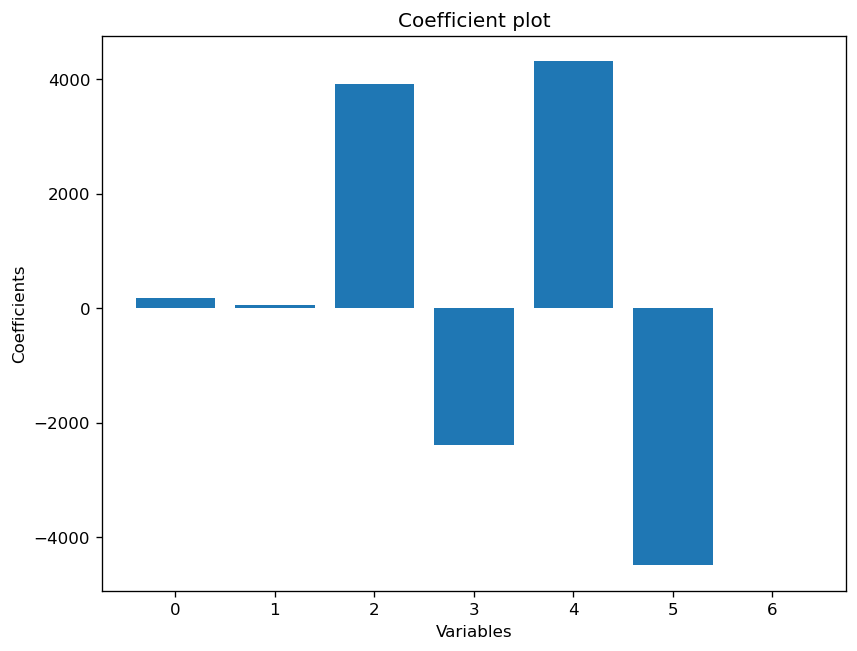

In [286]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
a = range(len(train_x2.columns))
b = lr.coef_
plt.bar( a, b )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Here we can see that model depends on two values basically, other values are insignificant in comparison.

### checking assumptions of linear model

In [287]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y2,
    'predicted values' : test_predict_lr,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
321708,828,1181.718924,-353.718924
691534,186,788.369621,-602.369621
403864,593,911.731282,-318.731282
634645,525,790.250530,-265.250530
696551,1679,764.132360,914.867640


### checking distribution of residuals

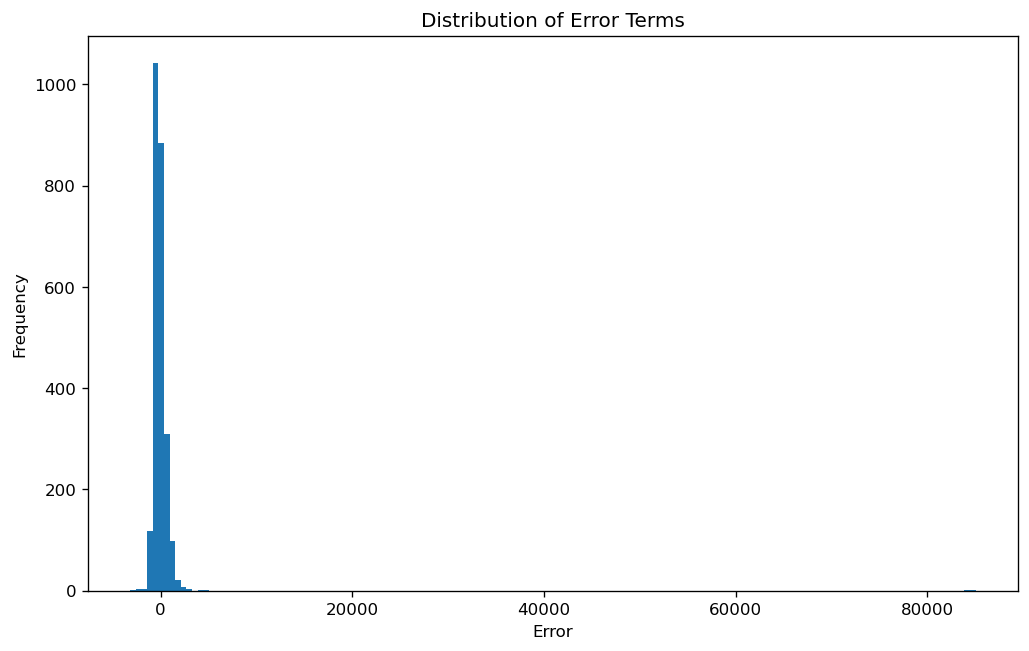

In [288]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

the distribution of resicduals is normal

### Q-Q plot

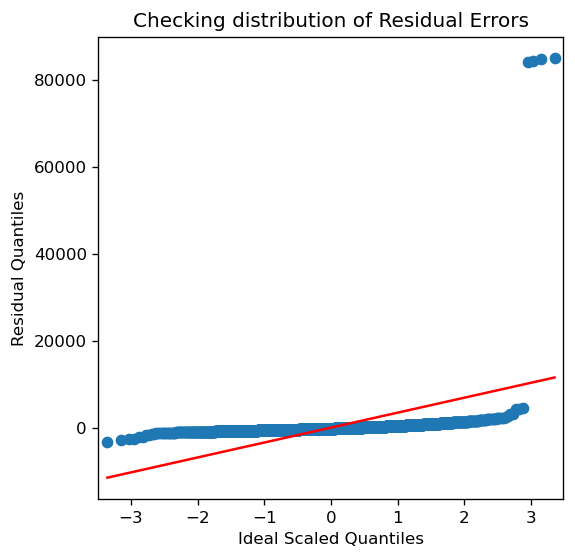

In [289]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

### model interpretability

In [300]:
# Creating instance of Linear Regresssion
lr_normalized = LR(normalize = True)

# Fitting the model
lr_normalized.fit(train_x2, train_y2)

LinearRegression(normalize=True)

In [301]:
# Predicting over the Train Set and calculating error
train_predict_lr_normalized = lr_normalized.predict(train_x2)
k_train_lr_normalized = mse(train_predict_lr_normalized, train_y2,squared=False)
print('Training Mean Squared Error', k_train_lr_normalized )

Training Mean Squared Error 3280.9199460244095


In [302]:
# Predicting over the Test Set and calculating error
test_predict_lr_normalized = lr_normalized.predict(test_x2)
k_test_lr_normalized = mse(test_predict_lr_normalized, test_y2,squared=False)
print('Test Mean Squared Error    ', k_test_lr_normalized )

Test Mean Squared Error     3433.1665915670187


In [303]:
lr_normalized.coef_

array([ 1.84959612e+02,  4.66415075e+01,  3.90821082e+03, -2.39049255e+03,
        4.30920618e+03, -4.49521227e+03,  1.74477582e-03])

Text(0.5, 1.0, 'Normalized Coefficient plot')

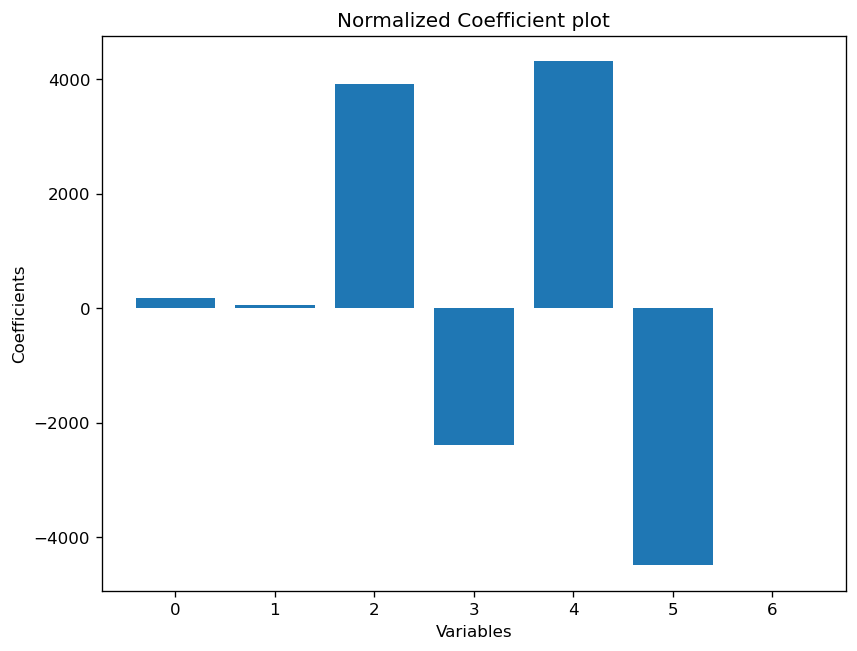

In [304]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
c = range(len(train_x2.columns))
d = lr_normalized.coef_
plt.bar( c, d )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [305]:
# training score
lr_train_score=lr.score(train_x2,train_y2)
lr_train_score

0.010161112203474376

In [306]:
# testing score
lr_test_score=lr.score(test_x2,test_y2)
lr_test_score

0.004160578441484986

# conclusions
1. the test and train rmse have huge difference with respective values as 901.8734980988819 and 2945.3543565054497.
2. there are some coeffecients with negative values as well and one coeffecient with negligible value.
3. the train score is very low 0.014618012597249375.
4. the test score is very low 0.12014754801960281.
5. test score is comparatively very high than train score.

#  comparing scores of KNN and LR models

In [307]:
train_score_knn,lr_train_score

(0.1222185907472706, 0.010161112203474376)

In [308]:
e=["knn train score","LR train score"]
f=[0.1298709228851228,0.014618012597249375]

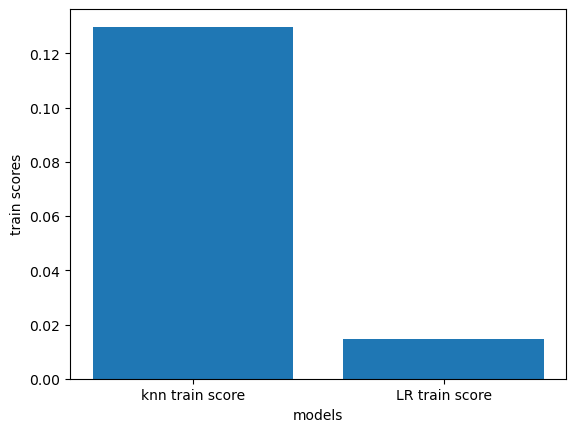

In [309]:
plt.figure(dpi=100)
plt.bar(e,f)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [310]:
test_score_knn,lr_test_score

(-0.06503894340635252, 0.004160578441484986)

In [311]:
g=["knn test score","LR test score"]
h=[-0.031089967869172952,0.12014754801960281]

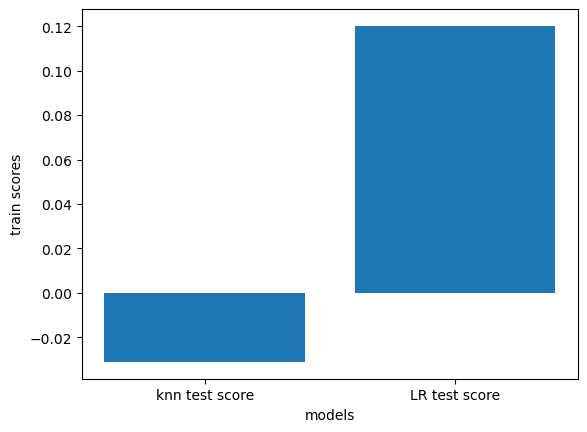

In [312]:
plt.figure(dpi=100)
plt.bar(g,h)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()